In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import requests
import seaborn as sns
import pandas as pd
import scipy
import os
from glob import glob

In [2]:
os.getcwd()

'/Users/christineromano/DSI_Course/DSI_Capstone_Project'

In [3]:
os.chdir('/Users/christineromano/DSI_Course/DSI_Capstone_Project/')

In [4]:
os.getcwd()

'/Users/christineromano/DSI_Course/DSI_Capstone_Project'

In [5]:
os.listdir()

['ttc-streetcar-delay-data-2024_cleaned_old.xlsx',
 'ttc-streetcar-delay-data-2024_cleaned_prior.xlsx',
 'ttc-streetcar-delay-data-2024_cleaned_extra_CAR.xlsx',
 'Exploratory_Data_Analyses',
 'ttc-streetcar-delay-data-2024_cleaned.xlsx',
 'High_Incidents_per_Streetcar_2024_filtered_11062025.png',
 '.DS_Store',
 'Location_Information_Spreadsheet.xlsx',
 'streetcar_delay_df_lines.csv',
 'ttc-streetcar-delay-data-2024_location_cleaning.xlsx',
 'ds6',
 'ttc-streetcar-delay-data-2024.xlsx',
 'Incidents_per_Location_2024.png',
 '2024_Streetcar_Delay_Columns_Renamed.csv',
 'TTC Streetcar Delay Data since 2025.csv',
 'Incidents_per_Streetcar_2024.png',
 'DS6_Capstone_Brainstorm_2.ipynb',
 'Incidents_per_Streetcar_2024_filtered_11062025.png',
 '~$ttc-streetcar-delay-data-2024_cleaned_extra_CAR.xlsx',
 'Num_Incident_Type_per_Location.csv',
 'DS6_Capstone_Brainstorm_3.ipynb',
 'ttc-streetcar-delay-data-2024_location_cleaning_pre_removal_bonus_lines.xlsx']

In [6]:
cleaned_df = pd.read_excel('ttc-streetcar-delay-data-2024_cleaned.xlsx', index_col=None)

In [7]:
cleaned_df.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-04-28,301,03:54,Sunday,WOLSELEY LOOP,Cleaning - Unsanitary,30,60,E,8118,4,18,28,3,Spring
1,2024-09-14,301,02:23,Saturday,WOLSELEY LOOP,Utilized Off Route,30,60,W,8112,9,37,14,2,Summer
2,2024-01-28,301,02:11,Sunday,WARDEN AND COMSTOCK,Mechanical,10,20,W,8734,1,5,28,2,Winter
3,2024-11-15,301,02:35,Friday,THE QUEENSWAY AND WIND,Security,24,39,W,4588,11,46,15,2,Fall
4,2024-08-25,301,03:11,Sunday,THE QUEENSWAY AND GLEN,Mechanical,10,30,E,4569,8,35,25,3,Summer


In [8]:
print(cleaned_df['Location'].nunique())

1572


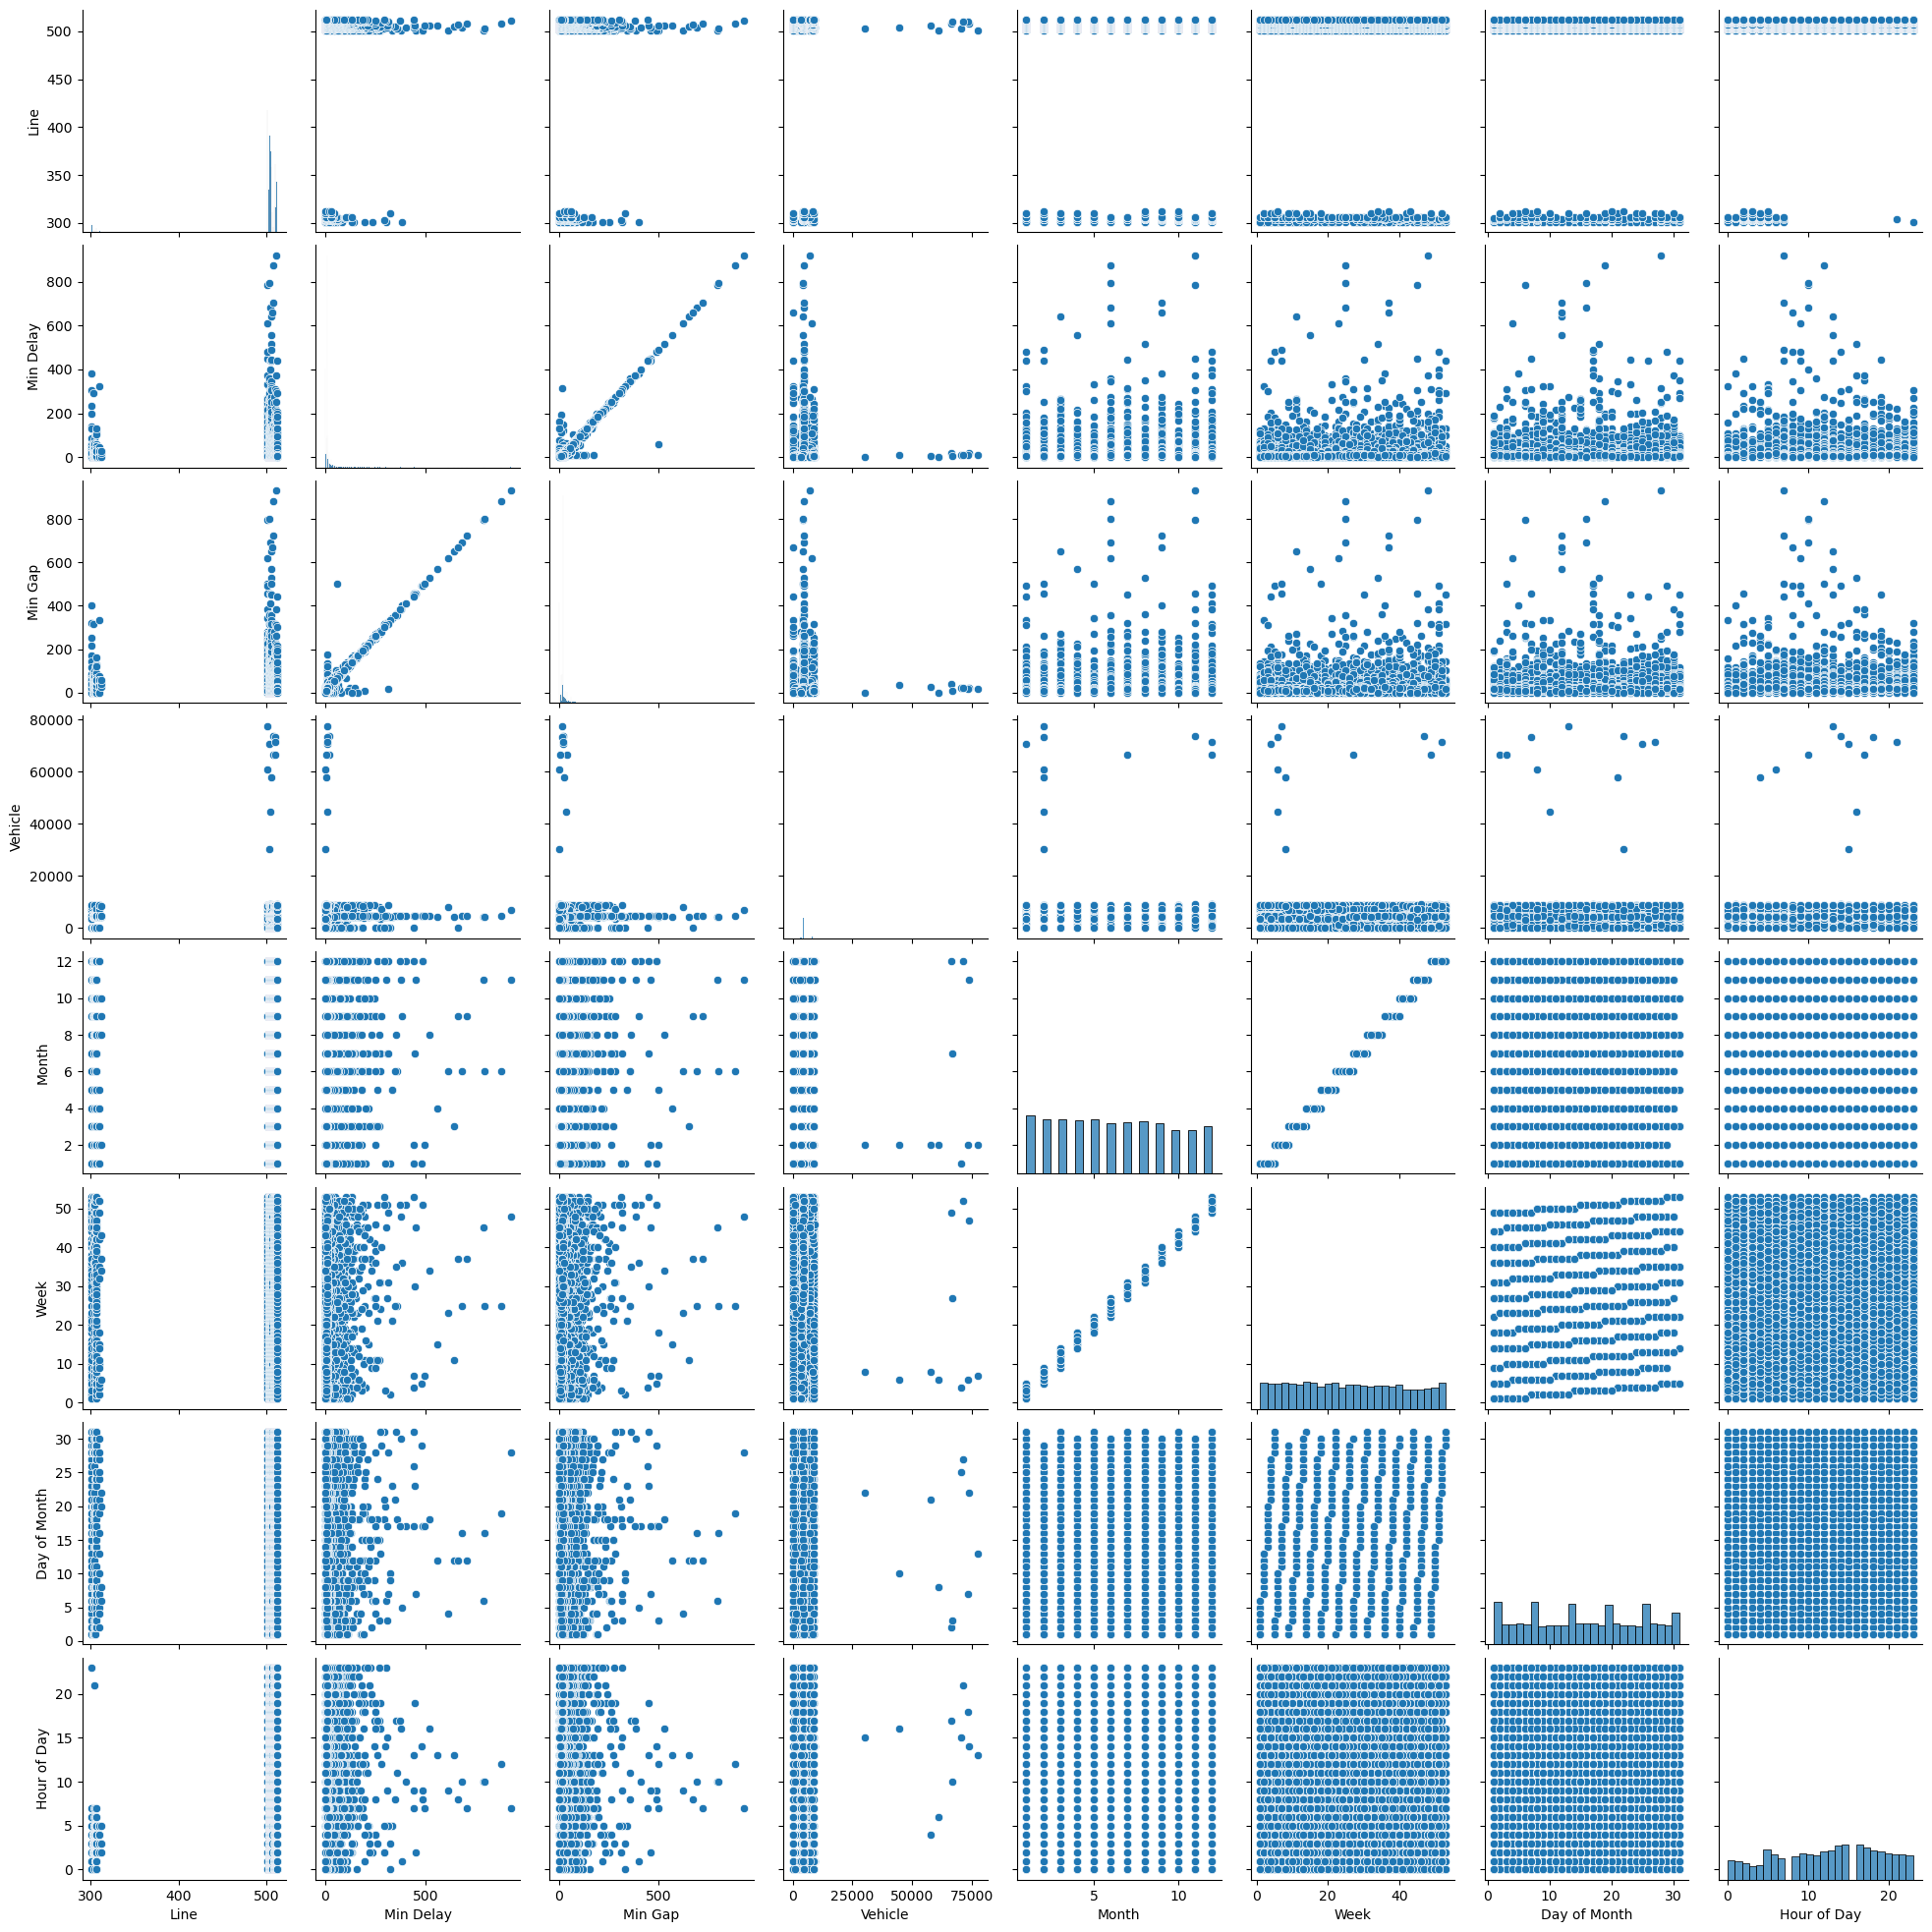

In [9]:
sns.pairplot(cleaned_df)

In [10]:
#cleaned_df = cleaned_df.rename(columns = {0:'Date', 1: 'Line', 2:'Time', 3:'Day', 4:'Location', 5:'Incident', 6:'Min Delay', 7:'Min Gap', 8:'Bound', 9:'Vehicle', 10:'Month', 11:'Week', 12:'Day of Month', 13:'Hour of Day', 14: 'Season'}).drop(index = 0)

In [11]:
#cleaned_df.head()

In [12]:
cleaned_df.columns

Index(['Date', 'Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle', 'Month', 'Week', 'Day of Month',
       'Hour of Day', 'Season'],
      dtype='object')

In [13]:
Min_Delay_vs_Incident = cleaned_df.groupby('Incident', as_index=False).agg({'Min Delay':'sum'}).rename(columns={'Min Delay': 'Total Minutes of Delay'})
Min_Delay_vs_Incident.head(40)

,Incident,Total Minutes of Delay
0,Cleaning - Unsanitary,14382
1,Collision - TTC Involved,14742
2,Diversion,74588
3,Emergency Services,18494
4,General Delay,13755
5,Held By,15667
6,Investigation,2801
7,Mechanical,16934
8,Operations,26726
9,Overhead,2641


In [14]:
Min_Delay_vs_Incident.tail(40)

,Incident,Total Minutes of Delay
0,Cleaning - Unsanitary,14382
1,Collision - TTC Involved,14742
2,Diversion,74588
3,Emergency Services,18494
4,General Delay,13755
5,Held By,15667
6,Investigation,2801
7,Mechanical,16934
8,Operations,26726
9,Overhead,2641


In [15]:
Min_Delay_vs_Incident.shape[0]

13

/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/3052173661.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})


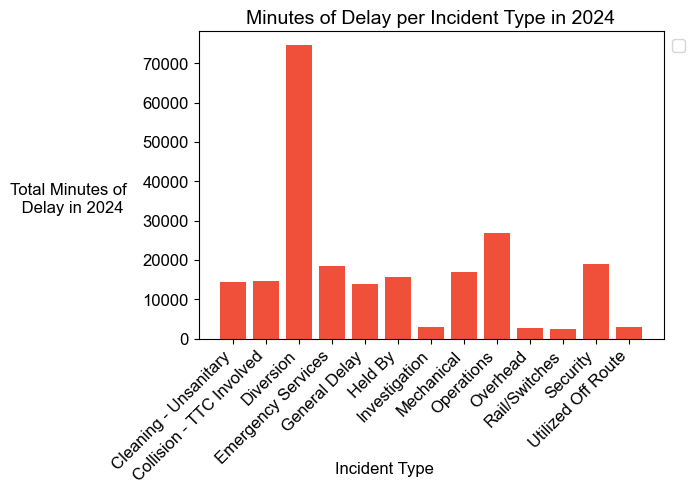

In [16]:
# Making a figure

font1 = {'family' : 'Arial', 'color': 'Black'} # Need to use a font dictionary to change title of graph.

x = Min_Delay_vs_Incident['Incident']
y = Min_Delay_vs_Incident['Total Minutes of Delay']

fig, ax = plt.subplots(figsize = (6, 4)) 
plt.bar(x, y, color= '#F05039' )

# Color choices taken from: https://www.datylon.com/blog/data-visualization-for-colorblind-readers

ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})
plt.xlabel('Incident Type', fontsize = 12, fontdict = font1, color = 'Black', labelpad=10)
plt.ylabel('Total Minutes of \n Delay in 2024', fontsize = 12, fontdict = font1, 
           color = 'Black', 
           labelpad=20, rotation = 0)

plt.xticks(rotation = 45, ha= 'right', fontsize = 12, fontname = 'Arial') # Customizing labels of x and y axes
plt.yticks(ha= 'right', fontsize = 12, fontname = 'Arial') #'ha' means horizontal alignment and can be left, right, or center

# Setting the position of the y axis label

ax.yaxis.set_label_coords(-0.275, 0.4)
ax.xaxis.set_label_coords(0.4, -0.4)

ax.set_title(
    "Minutes of Delay per Incident Type in 2024", 
    fontsize=14, 
    fontname='Arial', 
    color='black', 
    pad=5 ) # distance from the plot

plt.show()

In [17]:
#df_wide_min = Min_Delay_vs_Incident.pivot(index='Min Delay', columns='Incident', values='Number of Incidents').fillna(0)

In [18]:
'''fig, ax = plt.subplots(figsize=(6, 10))

# Track cumulative values for stacking
bottom = pd.Series([0]*len(df_wide_min), index=df_wide_min.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide_min .columns):
    ax.bar(df_wide_min.index, df_wide_min[incident],
            bottom=bottom,
            label=incident,
            color=colors[i % len(colors)])
    bottom += df_wide_min[incident]

# Labels and legend
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Min Delay')
ax.set_title('Stacked Bar Chart of Incident Types per Min Delay (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=4)

plt.xlim(0, 5000)
plt.ylim(0, 80)
ax.margins(y=0) 

plt.tight_layout()
plt.show()'''

"fig, ax = plt.subplots(figsize=(6, 10))\n\n# Track cumulative values for stacking\nbottom = pd.Series([0]*len(df_wide_min), index=df_wide_min.index)\n\ncolors = plt.cm.tab20.colors\n\n# Loop through incident types\nfor i, incident in enumerate(df_wide_min .columns):\n    ax.bar(df_wide_min.index, df_wide_min[incident],\n            bottom=bottom,\n            label=incident,\n            color=colors[i % len(colors)])\n    bottom += df_wide_min[incident]\n\n# Labels and legend\nax.set_ylabel('Number of Incidents')\nax.set_xlabel('Min Delay')\nax.set_title('Stacked Bar Chart of Incident Types per Min Delay (Horizontal)')\nax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')\n\nax.tick_params(axis='y', labelsize=4)\n\nplt.xlim(0, 5000)\nplt.ylim(0, 80)\nax.margins(y=0) \n\nplt.tight_layout()\nplt.show()"

In [19]:
Min_Delay_vs_Bound = cleaned_df.groupby('Bound', as_index=False).agg({'Min Delay':'sum'}).rename(columns={'Min Delay': 'Total Minutes of Delay'})
Min_Delay_vs_Bound.head(40)

,Bound,Total Minutes of Delay
0,E,76707
1,N,22319
2,S,20804
3,W,72917


In [20]:
Directions = ['N', 'S', 'E', 'W']
Min_Delay_vs_Bound = Min_Delay_vs_Bound[Min_Delay_vs_Bound['Bound'].isin(Directions)]
Min_Delay_vs_Bound.head()

,Bound,Total Minutes of Delay
0,E,76707
1,N,22319
2,S,20804
3,W,72917


In [21]:
Min_Delay_vs_Bound['Bound'].dtype

dtype('O')

In [22]:
Min_Delay_vs_Bound['Bound'] = Min_Delay_vs_Bound['Bound'].astype(str)

/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/3106785511.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})


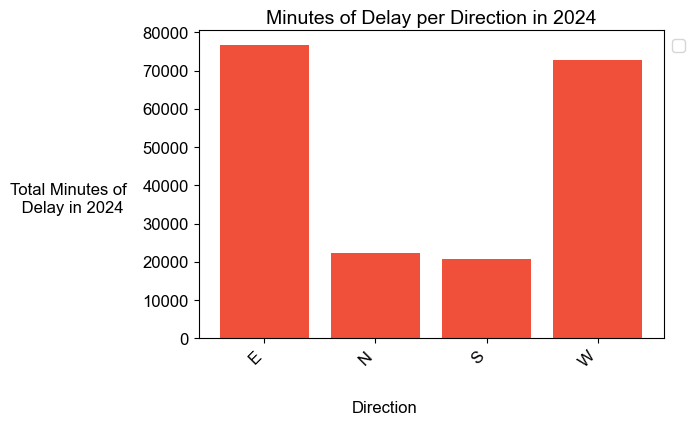

In [23]:
font1 = {'family' : 'Arial', 'color': 'Black'} # Need to use a font dictionary to change title of graph.

x = Min_Delay_vs_Bound['Bound']
y = Min_Delay_vs_Bound['Total Minutes of Delay']

fig, ax = plt.subplots(figsize = (6, 4)) 
plt.bar(x, y, color= '#F05039' )

# Color choices taken from: https://www.datylon.com/blog/data-visualization-for-colorblind-readers

ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})
plt.xlabel('Direction', fontsize = 12, fontdict = font1, color = 'Black', labelpad=10)
plt.ylabel('Total Minutes of \n Delay in 2024', fontsize = 12, fontdict = font1, 
           color = 'Black', 
           labelpad=20, rotation = 0)

plt.xticks(rotation = 45, ha= 'right', fontsize = 12, fontname = 'Arial') # Customizing labels of x and y axes
plt.yticks(ha= 'right', fontsize = 12, fontname = 'Arial') #'ha' means horizontal alignment and can be left, right, or center

# Setting the position of the y axis label

ax.yaxis.set_label_coords(-0.275, 0.4)
ax.xaxis.set_label_coords(0.4, -0.2)

ax.set_title(
    "Minutes of Delay per Direction in 2024", 
    fontsize=14, 
    fontname='Arial', 
    color='black', 
    pad=5 ) # distance from the plot

plt.show()

In [24]:
Min_Delay_vs_Bound = cleaned_df.groupby('Bound', as_index=False).agg({'Min Delay':'mean'}).rename(columns={'Min Delay': 'Total Minutes of Delay'})
Min_Delay_vs_Bound.head(40)

,Bound,Total Minutes of Delay
0,E,17.625689
1,N,13.785670
2,S,12.547648
3,W,16.863321


In [25]:
Directions = ['N', 'S', 'E', 'W']
Min_Delay_vs_Bound = Min_Delay_vs_Bound[Min_Delay_vs_Bound['Bound'].isin(Directions)]
Min_Delay_vs_Bound.head()

,Bound,Total Minutes of Delay
0,E,17.625689
1,N,13.785670
2,S,12.547648
3,W,16.863321


/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/1100426086.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})


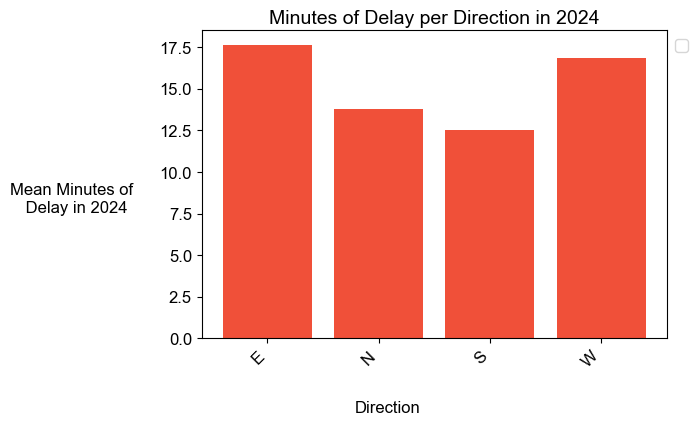

In [26]:
font1 = {'family' : 'Arial', 'color': 'Black'} # Need to use a font dictionary to change title of graph.

x = Min_Delay_vs_Bound['Bound']
y = Min_Delay_vs_Bound['Total Minutes of Delay']

fig, ax = plt.subplots(figsize = (6, 4)) 
plt.bar(x, y, color= '#F05039' )

# Color choices taken from: https://www.datylon.com/blog/data-visualization-for-colorblind-readers

ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})
plt.xlabel('Direction', fontsize = 12, fontdict = font1, color = 'Black', labelpad=10)
plt.ylabel('Mean Minutes of \n Delay in 2024', fontsize = 12, fontdict = font1, 
           color = 'Black', 
           labelpad=20, rotation = 0)

plt.xticks(rotation = 45, ha= 'right', fontsize = 12, fontname = 'Arial') # Customizing labels of x and y axes
plt.yticks(ha= 'right', fontsize = 12, fontname = 'Arial') #'ha' means horizontal alignment and can be left, right, or center

# Setting the position of the y axis label

ax.yaxis.set_label_coords(-0.275, 0.4)
ax.xaxis.set_label_coords(0.4, -0.2)

ax.set_title(
    "Minutes of Delay per Direction in 2024", 
    fontsize=14, 
    fontname='Arial', 
    color='black', 
    pad=5 ) # distance from the plot

plt.show()

In [27]:
Min_Delay_vs_Incident = cleaned_df.groupby('Incident', as_index=False).agg({'Min Delay':'mean'}).rename(columns={'Min Delay': 'Total Minutes of Delay'})
Min_Delay_vs_Incident.head(40)

,Incident,Total Minutes of Delay
0,Cleaning - Unsanitary,10.598379
1,Collision - TTC Involved,22.575804
2,Diversion,43.823737
3,Emergency Services,14.117557
4,General Delay,7.914269
5,Held By,21.228997
6,Investigation,13.027907
7,Mechanical,10.152278
8,Operations,12.000898
9,Overhead,49.830189


/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/1989228682.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})


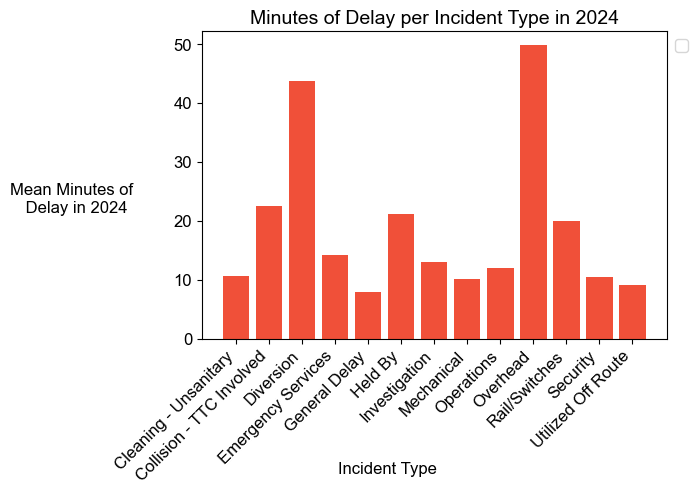

In [28]:
# Making a figure

font1 = {'family' : 'Arial', 'color': 'Black'} # Need to use a font dictionary to change title of graph.

x = Min_Delay_vs_Incident['Incident']
y = Min_Delay_vs_Incident['Total Minutes of Delay']

fig, ax = plt.subplots(figsize = (6, 4)) 
plt.bar(x, y, color= '#F05039' )

# Color choices taken from: https://www.datylon.com/blog/data-visualization-for-colorblind-readers

ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), prop = {'family': 'Arial', 'size' : 12})
plt.xlabel('Incident Type', fontsize = 12, fontdict = font1, color = 'Black', labelpad=10)
plt.ylabel('Mean Minutes of \n Delay in 2024', fontsize = 12, fontdict = font1, 
           color = 'Black', 
           labelpad=20, rotation = 0)

plt.xticks(rotation = 45, ha= 'right', fontsize = 12, fontname = 'Arial') # Customizing labels of x and y axes
plt.yticks(ha= 'right', fontsize = 12, fontname = 'Arial') #'ha' means horizontal alignment and can be left, right, or center

# Setting the position of the y axis label

ax.yaxis.set_label_coords(-0.275, 0.4)
ax.xaxis.set_label_coords(0.4, -0.4)

ax.set_title(
    "Minutes of Delay per Incident Type in 2024", 
    fontsize=14, 
    fontname='Arial', 
    color='black', 
    pad=5 ) # distance from the plot

plt.show()

In [29]:
raw_df = pd.read_excel('ttc-streetcar-delay-data-2024.xlsx', index_col=None)
raw_df.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,2024-01-01,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,2024-01-01,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,2024-01-01,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,2024-01-01,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,2024-01-01,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116


In [30]:
raw_df['Location'].nunique()

2103

In [31]:
cleaned_df['Location'].nunique()

1572

In [32]:
cleaned_df = pd.read_excel('ttc-streetcar-delay-data-2024_cleaned_extra_CAR.xlsx', index_col=None)

In [33]:
cleaned_df

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-12-06,511,04:45,Friday,YORKDALE STATION,Mechanical,10,20,S,3518,12,49,6,4,Fall
1,2024-12-10,501,11:58,Tuesday,YORK AND YONGE,General Delay,12,22,E,4442,12,50,10,11,Fall
2,2024-01-01,501,14:26,Monday,YORK AND WELLINGTON,Security,5,15,N,4572,1,1,1,14,Winter
3,2024-01-10,501,22:28,Wednesday,YORK AND WELLINGTON,Security,50,60,W,4543,1,2,10,22,Winter
4,2024-05-09,501,00:24,Thursday,YORK AND WELLINGTON,Emergency Services,0,0,W,4505,5,19,9,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2024-04-22,512,15:38,Monday,AND OAKWOOD,General Delay,0,0,W,7006,4,17,22,15,Spring
13927,2024-02-18,512,19:50,Sunday,AND KEELE,Operations,8,15,E,8337,2,8,18,19,Winter
13928,2024-04-19,512,20:24,Friday,AND GLENHOLME,Mechanical,10,20,W,8799,4,16,19,20,Spring
13929,2024-02-20,512,16:20,Tuesday,AND EARLS COU,Collision - TTC Involved,4,8,E,8295,2,8,20,16,Winter


In [34]:
cleaned_df.shape[0]

13931

In [35]:
num = (
    cleaned_df
    .groupby(['Location', 'Incident'])
    .size()
    .reset_index(name='Count')
)

# totals per Location
totals = (
    cleaned_df
    .groupby('Location')
    .size()
    .reset_index(name='Total Incidents')
)

# merge once, clean result
Num_Incident_Type_per_Location = num.merge(totals, on='Location', how='left')

# optional: ensure integer dtype for totals
Num_Incident_Type_per_Location['Total Incidents'] = Num_Incident_Type_per_Location['Total Incidents'].astype(int)

Num_Incident_Type_per_Location.tail()

,Location,Incident,Count,Total Incidents
4089,YORK AND WELLINGTON,Emergency Services,1,8
4090,YORK AND WELLINGTON,Held By,3,8
4091,YORK AND WELLINGTON,Security,2,8
4092,YORK AND YONGE,General Delay,1,1
4093,YORKDALE STATION,Mechanical,1,1


In [36]:
Num_Incident_Type_per_Location.to_csv('Num_Incident_Type_per_Location.csv', index=False)

In [37]:
Num_Incident_Type_per_Location.head(40)

,Location,Incident,Count,Total Incidents
0,AND DEER PARK,Operations,1,1
1,AND EARLS COU,Collision - TTC Involved,1,1
2,AND GLENHOLME,Mechanical,1,1
3,AND KEELE,Operations,1,1
4,AND OAKWOOD,General Delay,1,1
5,AND WARREN,General Delay,1,1
6,AND YONGE (IN,Collision - TTC Involved,1,1
7,STATION,General Delay,1,2
8,STATION,Security,1,2
9,10 LAKE SHORE BLVD WES,Cleaning - Unsanitary,1,1


In [38]:
Num_Incident_Type_per_Location_Filtered = Num_Incident_Type_per_Location[Num_Incident_Type_per_Location['Total Incidents'] >= 0]
Num_Incident_Type_per_Location_Filtered.shape[0]

4094

In [39]:
Num_Incident_Type_per_Location_Filtered['Location'].nunique()

1416

In [40]:
df_wide = Num_Incident_Type_per_Location_Filtered.pivot(
    index='Location',
    columns='Incident',
    values='Count'
).fillna(0)

df_wide.head()

Incident,Cleaning - Unsanitary,Collision - TTC Involved,Diversion,Emergency Services,General Delay,Held By,Investigation,Mechanical,Operations,Overhead,Rail/Switches,Security,Utilized Off Route
Location,,,,,,,,,,,,,
AND DEER PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AND EARLS COU,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AND GLENHOLME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AND KEELE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AND OAKWOOD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_wide.shape[0]

1416

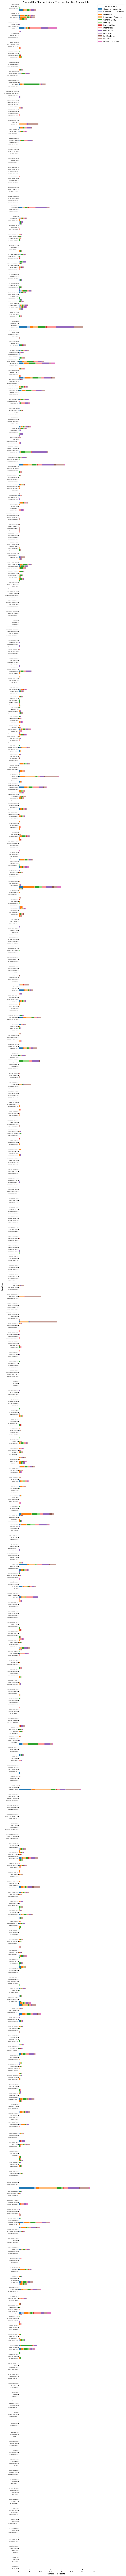

In [42]:
fig, ax = plt.subplots(figsize=(10, 200))

# Track cumulative values for stacking
left = pd.Series([0]*len(df_wide), index=df_wide.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide.columns):
    ax.barh(df_wide.index, df_wide[incident],
            left=left,
            label=incident,
            color=colors[i % len(colors)])
    left += df_wide[incident]

# Labels and legend
ax.set_ylabel('Location')
ax.set_xlabel('Number of Incidents')
ax.set_title('Stacked Bar Chart of Incident Types per Location (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=4)

plt.xlim(0, 350)
ax.margins(y=0) 

plt.tight_layout()
plt.show()

In [43]:
Num_Incident_Type_per_Location_Filtered.head()

,Location,Incident,Count,Total Incidents
0,AND DEER PARK,Operations,1,1
1,AND EARLS COU,Collision - TTC Involved,1,1
2,AND GLENHOLME,Mechanical,1,1
3,AND KEELE,Operations,1,1
4,AND OAKWOOD,General Delay,1,1


In [44]:
Num_Incident_Type_per_Location_Filtered.shape[0]

4094

In [45]:
# Sort Stations into categories based on incident count

conditions = [
    Num_Incident_Type_per_Location_Filtered['Total Incidents'] < 10,
    Num_Incident_Type_per_Location_Filtered['Total Incidents'].between(10, 49),
    Num_Incident_Type_per_Location_Filtered['Total Incidents'].between(50, 99),
    Num_Incident_Type_per_Location_Filtered['Total Incidents'] >= 100
]
choices = ['Less than 10', '10 to 49', '50 to 99', '100 or More']

Num_Incident_Type_per_Location_Filtered['Location Category'] = np.select(conditions, choices)

Num_Incident_Type_per_Location_Filtered.head()

,Location,Incident,Count,Total Incidents,Location Category
0,AND DEER PARK,Operations,1,1,Less than 10
1,AND EARLS COU,Collision - TTC Involved,1,1,Less than 10
2,AND GLENHOLME,Mechanical,1,1,Less than 10
3,AND KEELE,Operations,1,1,Less than 10
4,AND OAKWOOD,General Delay,1,1,Less than 10


In [46]:
Num_Incident_Type_per_Location_Filtered.groupby(['Location', 'Location Category']).size()
Num_Incident_Type_per_Location_Filtered.head()

,Location,Incident,Count,Total Incidents,Location Category
0,AND DEER PARK,Operations,1,1,Less than 10
1,AND EARLS COU,Collision - TTC Involved,1,1,Less than 10
2,AND GLENHOLME,Mechanical,1,1,Less than 10
3,AND KEELE,Operations,1,1,Less than 10
4,AND OAKWOOD,General Delay,1,1,Less than 10


In [47]:
category_counts = Num_Incident_Type_per_Location_Filtered['Location Category'].value_counts()

Num_Incident_Type_per_Location_Filtered['Category Count'] = (
    Num_Incident_Type_per_Location_Filtered['Location Category'].map(category_counts)
)

In [48]:
Num_Incident_Type_per_Location_Filtered.groupby('Location Category').size()
Num_Incident_Type_per_Location_Filtered.head()

,Location,Incident,Count,Total Incidents,Location Category,Category Count
0,AND DEER PARK,Operations,1,1,Less than 10,1893
1,AND EARLS COU,Collision - TTC Involved,1,1,Less than 10,1893
2,AND GLENHOLME,Mechanical,1,1,Less than 10,1893
3,AND KEELE,Operations,1,1,Less than 10,1893
4,AND OAKWOOD,General Delay,1,1,Less than 10,1893


In [49]:
Num_Incident_Type_per_Location_Filtered['Location Category'].value_counts()

Location Category
Less than 10    1893
10 to 49        1476
50 to 99         432
100 or More      293
Name: count, dtype: int64

In [50]:
# Find high incident locations

High_Incident_Locations = Num_Incident_Type_per_Location_Filtered[Num_Incident_Type_per_Location_Filtered['Location Category']== '100 or More']
print(High_Incident_Locations)

                Location                  Incident  Count  Total Incidents  \
211   BATHURST AND QUEEN     Cleaning - Unsanitary     11              152   
212   BATHURST AND QUEEN  Collision - TTC Involved     13              152   
213   BATHURST AND QUEEN                 Diversion     19              152   
214   BATHURST AND QUEEN        Emergency Services     12              152   
215   BATHURST AND QUEEN             General Delay      9              152   
...                  ...                       ...    ...              ...   
4032       WOLSELEY LOOP             Investigation      3              182   
4033       WOLSELEY LOOP                Mechanical     55              182   
4034       WOLSELEY LOOP                Operations     33              182   
4035       WOLSELEY LOOP                  Security      5              182   
4036       WOLSELEY LOOP        Utilized Off Route     38              182   

     Location Category  Category Count  
211        100 or More

In [51]:
High_Incident_Locations.dtypes

Location             object
Incident             object
Count                 int64
Total Incidents       int64
Location Category    object
Category Count        int64
dtype: object

In [52]:
type(High_Incident_Locations)

pandas.core.frame.DataFrame

In [53]:
High_Incident_Locations.head(40)

,Location,Incident,Count,Total Incidents,Location Category,Category Count
211,BATHURST AND QUEEN,Cleaning - Unsanitary,11,152,100 or More,293
212,BATHURST AND QUEEN,Collision - TTC Involved,13,152,100 or More,293
213,BATHURST AND QUEEN,Diversion,19,152,100 or More,293
214,BATHURST AND QUEEN,Emergency Services,12,152,100 or More,293
215,BATHURST AND QUEEN,General Delay,9,152,100 or More,293
216,BATHURST AND QUEEN,Held By,5,152,100 or More,293
217,BATHURST AND QUEEN,Investigation,2,152,100 or More,293
218,BATHURST AND QUEEN,Mechanical,35,152,100 or More,293
219,BATHURST AND QUEEN,Operations,14,152,100 or More,293
220,BATHURST AND QUEEN,Security,15,152,100 or More,293


In [54]:
df_wide = High_Incident_Locations.pivot(
    index='Location',
    columns='Incident',
    values='Count'
).fillna(0)

df_wide.head()

Incident,Cleaning - Unsanitary,Collision - TTC Involved,Diversion,Emergency Services,General Delay,Held By,Investigation,Mechanical,Operations,Overhead,Rail/Switches,Security,Utilized Off Route
Location,,,,,,,,,,,,,
BATHURST AND QUEEN,11.0,13.0,19.0,12.0,9.0,5.0,2.0,35.0,14.0,0.0,0.0,15.0,17.0
BATHURST STATION,12.0,1.0,6.0,22.0,12.0,2.0,1.0,9.0,23.0,0.0,0.0,14.0,3.0
BROADVIEW AND GERRARD,19.0,6.0,22.0,8.0,22.0,4.0,2.0,27.0,17.0,0.0,2.0,15.0,4.0
BROADVIEW STATION,74.0,7.0,14.0,86.0,20.0,8.0,2.0,22.0,52.0,1.0,2.0,45.0,1.0
COXWELL AND GERRARD,15.0,0.0,13.0,11.0,16.0,4.0,0.0,10.0,19.0,0.0,1.0,13.0,1.0


In [55]:
High_Incident_Locations['Location'].nunique()

27

In [56]:
'''fig, ax = plt.subplots(figsize=(10, 20))

# Track cumulative values for stacking
left = pd.Series([0]*len(df_wide), index=df_wide.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide.columns):
    ax.barh(df_wide.index, df_wide[incident],
            left=left,
            label=incident,
            color=colors[i % len(colors)])
    left += df_wide[incident]

# Labels and legend
ax.set_ylabel('Location')
ax.set_xlabel('Number of Incidents')
ax.set_title('Stacked Bar Chart of Incident Types per Location (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=4)

plt.xlim(0, 350)
ax.margins(y=0) 

plt.tight_layout()
plt.show()'''

"fig, ax = plt.subplots(figsize=(10, 20))\n\n# Track cumulative values for stacking\nleft = pd.Series([0]*len(df_wide), index=df_wide.index)\n\ncolors = plt.cm.tab20.colors\n\n# Loop through incident types\nfor i, incident in enumerate(df_wide.columns):\n    ax.barh(df_wide.index, df_wide[incident],\n            left=left,\n            label=incident,\n            color=colors[i % len(colors)])\n    left += df_wide[incident]\n\n# Labels and legend\nax.set_ylabel('Location')\nax.set_xlabel('Number of Incidents')\nax.set_title('Stacked Bar Chart of Incident Types per Location (Horizontal)')\nax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')\n\nax.tick_params(axis='y', labelsize=4)\n\nplt.xlim(0, 350)\nax.margins(y=0) \n\nplt.tight_layout()\nplt.show()"

In [57]:
High_Incident_Locations_wide = High_Incident_Locations.pivot_table(
    index='Location',
    columns='Incident',
    values='Count',
    fill_value=0
)
High_Incident_Locations_wide.head()

Incident,Cleaning - Unsanitary,Collision - TTC Involved,Diversion,Emergency Services,General Delay,Held By,Investigation,Mechanical,Operations,Overhead,Rail/Switches,Security,Utilized Off Route
Location,,,,,,,,,,,,,
BATHURST AND QUEEN,11.0,13.0,19.0,12.0,9.0,5.0,2.0,35.0,14.0,0.0,0.0,15.0,17.0
BATHURST STATION,12.0,1.0,6.0,22.0,12.0,2.0,1.0,9.0,23.0,0.0,0.0,14.0,3.0
BROADVIEW AND GERRARD,19.0,6.0,22.0,8.0,22.0,4.0,2.0,27.0,17.0,0.0,2.0,15.0,4.0
BROADVIEW STATION,74.0,7.0,14.0,86.0,20.0,8.0,2.0,22.0,52.0,1.0,2.0,45.0,1.0
COXWELL AND GERRARD,15.0,0.0,13.0,11.0,16.0,4.0,0.0,10.0,19.0,0.0,1.0,13.0,1.0


/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/1160367409.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mpl_colors = colors = plt.cm.get_cmap('tab10').colors
/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/1160367409.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(High_Incident_Locations_wide.index, rotation=45, ha='right', fontsize=8)


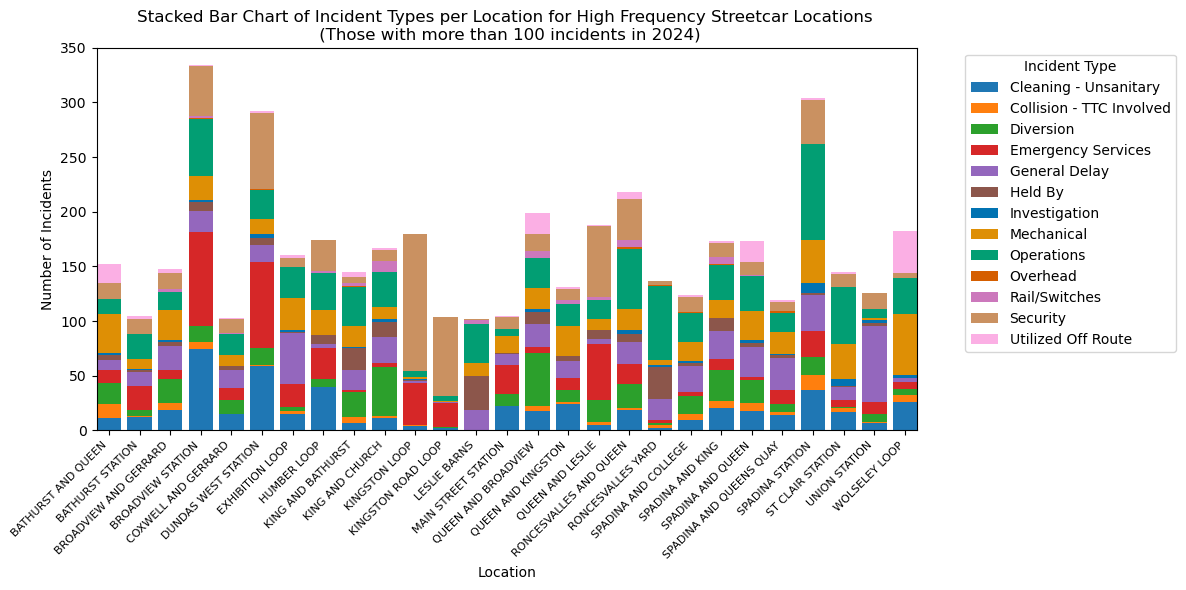

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

# Track cumulative values for stacking
bottom = pd.Series([0]*len(High_Incident_Locations_wide), index=High_Incident_Locations_wide.index)

seaborn_colors = sns.color_palette("colorblind", n_colors=len(High_Incident_Locations_wide.columns))
mpl_colors = colors = plt.cm.get_cmap('tab10').colors
combined_colors = list(mpl_colors[:6]) + list(seaborn_colors[:8])

# Loop through incident types
for i, incident in enumerate(High_Incident_Locations_wide.columns):
    ax.bar(High_Incident_Locations_wide.index, High_Incident_Locations_wide[incident],
            bottom=bottom,
            label=incident,
            color=combined_colors[i])
    bottom += High_Incident_Locations_wide[incident]

# Labels and legend
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Location')
ax.set_title('Stacked Bar Chart of Incident Types per Location for High Frequency Streetcar Locations \n (Those with more than 100 incidents in 2024)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xticklabels(High_Incident_Locations_wide.index, rotation=45, ha='right', fontsize=8)

plt.ylim(0, 350)
ax.margins(x=0) 

plt.tight_layout()
plt.show()

In [59]:
Less_than_10_List = Num_Incident_Type_per_Location_Filtered[Num_Incident_Type_per_Location_Filtered['Location Category']== 'Less than 10']
Less_than_10_List.head()



,Location,Incident,Count,Total Incidents,Location Category,Category Count
0,AND DEER PARK,Operations,1,1,Less than 10,1893
1,AND EARLS COU,Collision - TTC Involved,1,1,Less than 10,1893
2,AND GLENHOLME,Mechanical,1,1,Less than 10,1893
3,AND KEELE,Operations,1,1,Less than 10,1893
4,AND OAKWOOD,General Delay,1,1,Less than 10,1893


In [60]:
Less_than_10_List['Location'].nunique()

1149

In [61]:
Less_than_10_List['Location'].unique()

array([' AND DEER PARK', ' AND EARLS COU', ' AND GLENHOLME', ...,
       'YORK AND WELLINGTON', 'YORK AND YONGE', 'YORKDALE STATION'],
      dtype=object)

In [62]:
Between_10_and_50 = Num_Incident_Type_per_Location_Filtered[Num_Incident_Type_per_Location_Filtered['Location Category']== '10 to 49']
Between_10_and_50['Location'].nunique()

197

In [63]:
Between_10_and_50['Location'].unique()

array(['BATHURST AND BLOOR', 'BATHURST AND FORT YORK',
       'BATHURST AND HARBORD', 'BATHURST AND LAKESHORE',
       'BATHURST AND NIAGARA', 'BATHURST AND WOLSELEY', 'BAY AND COLLEGE',
       'BAY AND FRONT', 'BERKELEY AND KING', 'BROADVIEW AND DANFORTH',
       'BROADVIEW AND JACK LAY', 'BROADVIEW AND LANGLEY',
       'BROADVIEW AND MOUNTSTE', 'BROADVIEW AND WITHROW',
       'BROADVIEW AND WOLFREY', 'CARLTON AND CHURCH',
       'CARLTON AND JARVIS', 'CARLTON AND PARLIAMENT',
       'CARLTON AND SHERBOURNE', 'CARLTON AND YONGE',
       'CHARLOTTE AND OXLEY', 'CHERRY AND FRONT', 'CHURCH AND ADELAIDE',
       'COLLEGE AND AUGUSTA', 'COLLEGE AND BEVERLEY',
       'COLLEGE AND BORDEN', 'COLLEGE AND BROCK',
       'COLLEGE AND DOVERCOURT', 'COLLEGE AND DUFFERIN',
       'COLLEGE AND EUCLID', 'COLLEGE AND GRACE', 'COLLEGE AND MCCAUL',
       'COLLEGE AND OSSINGTON', 'COLLEGE AND UNIVERSITY',
       'CONNAUGHT AND QUEEN', 'COXWELL LOOP', 'DUFFERIN AND LIBERTY',
       'DUFFERIN AND SPRINGHU

In [64]:
Between_50_and_100 = Num_Incident_Type_per_Location_Filtered[Num_Incident_Type_per_Location_Filtered['Location Category']== '50 to 99']
Between_50_and_100['Location'].nunique()

43

In [65]:
Between_50_and_100['Location'].unique()

array(['BATHURST AND DUNDAS', 'BATHURST AND FLEET', 'BAY AND DUNDAS',
       'BAY AND KING', 'BINGHAM LOOP', 'BROADVIEW AND DUNDAS',
       'CHARLOTTE LOOP', 'CHURCH AND QUEEN', 'CNE LOOP',
       'COLLEGE AND BATHURST', 'COLLEGE AND LANSDOWNE', 'DISTILLERY LOOP',
       'DUFFERIN AND KING', 'DUNDAS AND LANSDOWNE',
       'DUNDAS AND PARLIAMENT', 'DUNDAS AND SPADINA', 'GERRARD AND MUNRO',
       'GERRARD AND PARLIAMENT', 'GUNNS LOOP', 'HIGH PARK LOOP',
       'HOWARD PARK AND RONCESVALLES', 'KING AND PARLIAMENT',
       'LANSDOWNE LOOP', 'LONG BRANCH LOOP', 'NEVILLE LOOP',
       'QUEEN AND COXWELL', 'QUEEN AND DUFFERIN', 'QUEEN AND MCCAUL',
       'QUEEN AND NEVILLE PARK', 'QUEEN AND PARLIAMENT',
       'QUEEN AND WOODFIELD', 'QUEENS QUAY AND REES', 'SHAW AND QUEEN',
       'SPADINA AND BLOOR', 'SPADINA AND BREMNER',
       'ST CLAIR AND DUFFERIN', 'ST CLAIR WEST STATION',
       'SUMACH AND KING', 'SUNNYSIDE LOOP', 'VAUGHAN AND ST CLAIR',
       'YONGE AND DUNDAS', 'YONGE AND KING', 

In [66]:
location_data_summary = {'Location Category': choices, 
                         'Number of Locations in Category' : [Less_than_10_List['Location'].nunique(), Between_10_and_50['Location'].nunique(), 
                                                 Between_50_and_100['Location'].nunique(), High_Incident_Locations['Location'].nunique() ],
}

In [67]:
print(location_data_summary)

{'Location Category': ['Less than 10', '10 to 49', '50 to 99', '100 or More'], 'Number of Locations in Category': [1149, 197, 43, 27]}


In [68]:
location_data_df = pd.DataFrame(location_data_summary)
location_data_df

,Location Category,Number of Locations in Category
0,Less than 10,1149
1,10 to 49,197
2,50 to 99,43
3,100 or More,27


In [69]:
trial_df = Num_Incident_Type_per_Location_Filtered.groupby('Location Category', as_index=False)['Count'].sum()
trial_df.head(20)

,Location Category,Count
0,10 to 49,4216
1,100 or More,4490
2,50 to 99,2902
3,Less than 10,2322


In [70]:
Num_Incident_Type_per_Location_Filtered.shape[0]

4094

In [71]:
trial2_df = pd.merge(location_data_df, trial_df, on = 'Location Category')
trial2_df

,Location Category,Number of Locations in Category,Count
0,Less than 10,1149,2322
1,10 to 49,197,4216
2,50 to 99,43,2902
3,100 or More,27,4490


In [72]:
sum_row = trial2_df.select_dtypes(include='number').sum()
df_with_total = pd.concat([trial2_df, pd.DataFrame([sum_row])], ignore_index=True)

df_with_total

,Location Category,Number of Locations in Category,Count
0,Less than 10,1149,2322
1,10 to 49,197,4216
2,50 to 99,43,2902
3,100 or More,27,4490
4,NaN,1416,13930


In [73]:
df_with_total['Percentage of Total Locations'] = df_with_total['Number of Locations in Category']*200/((df_with_total['Number of Locations in Category'].sum()))
df_with_total['Percentage of Total Incidents'] = df_with_total['Count']*200/((df_with_total['Count'].sum()))
df_with_total["Percentage of Total Locations"] = df_with_total['Percentage of Total Locations'].round(2)
df_with_total["Percentage of Total Incidents"] = df_with_total['Percentage of Total Incidents'].round(2)
df_with_total

,Location Category,Number of Locations in Category,Count,Percentage of Total Locations,Percentage of Total Incidents
0,Less than 10,1149,2322,81.14,16.67
1,10 to 49,197,4216,13.91,30.27
2,50 to 99,43,2902,3.04,20.83
3,100 or More,27,4490,1.91,32.23
4,NaN,1416,13930,100.00,100.00


In [74]:
df_with_total = df_with_total.rename(columns = {'Location Category' : 'Location Category (Number of Incidents per Year)', 'Count': 'Number of Incidents in this Category'})
df_with_total

,Location Category (Number of Incidents per Year),Number of Locations in Category,Number of Incidents in this Category,Percentage of Total Locations,Percentage of Total Incidents
0,Less than 10,1149,2322,81.14,16.67
1,10 to 49,197,4216,13.91,30.27
2,50 to 99,43,2902,3.04,20.83
3,100 or More,27,4490,1.91,32.23
4,NaN,1416,13930,100.00,100.00


In [75]:
df_with_total.at[4, 'Location Category (Number of Incidents per Year)'] = 'Total'
df_with_total

,Location Category (Number of Incidents per Year),Number of Locations in Category,Number of Incidents in this Category,Percentage of Total Locations,Percentage of Total Incidents
0,Less than 10,1149,2322,81.14,16.67
1,10 to 49,197,4216,13.91,30.27
2,50 to 99,43,2902,3.04,20.83
3,100 or More,27,4490,1.91,32.23
4,Total,1416,13930,100.00,100.00


In [76]:
cleaned_df

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-12-06,511,04:45,Friday,YORKDALE STATION,Mechanical,10,20,S,3518,12,49,6,4,Fall
1,2024-12-10,501,11:58,Tuesday,YORK AND YONGE,General Delay,12,22,E,4442,12,50,10,11,Fall
2,2024-01-01,501,14:26,Monday,YORK AND WELLINGTON,Security,5,15,N,4572,1,1,1,14,Winter
3,2024-01-10,501,22:28,Wednesday,YORK AND WELLINGTON,Security,50,60,W,4543,1,2,10,22,Winter
4,2024-05-09,501,00:24,Thursday,YORK AND WELLINGTON,Emergency Services,0,0,W,4505,5,19,9,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2024-04-22,512,15:38,Monday,AND OAKWOOD,General Delay,0,0,W,7006,4,17,22,15,Spring
13927,2024-02-18,512,19:50,Sunday,AND KEELE,Operations,8,15,E,8337,2,8,18,19,Winter
13928,2024-04-19,512,20:24,Friday,AND GLENHOLME,Mechanical,10,20,W,8799,4,16,19,20,Spring
13929,2024-02-20,512,16:20,Tuesday,AND EARLS COU,Collision - TTC Involved,4,8,E,8295,2,8,20,16,Winter


In [77]:
num2 = (
    cleaned_df
    .groupby('Location')['Min Delay']
    .sum(numeric_only=True).reset_index()
    .rename(columns = {'Min Delay': 'Total Minutes of Delay'})
)

num2

,Location,Total Minutes of Delay
0,AND DEER PARK,5
1,AND EARLS COU,4
2,AND GLENHOLME,10
3,AND KEELE,8
4,AND OAKWOOD,0
...,...,...
1411,YORK AND ADELAIDE,0
1412,YORK AND KING,1843
1413,YORK AND WELLINGTON,451
1414,YORK AND YONGE,12


In [78]:
Num_Incident_Type_per_Location_Filtered


,Location,Incident,Count,Total Incidents,Location Category,Category Count
0,AND DEER PARK,Operations,1,1,Less than 10,1893
1,AND EARLS COU,Collision - TTC Involved,1,1,Less than 10,1893
2,AND GLENHOLME,Mechanical,1,1,Less than 10,1893
3,AND KEELE,Operations,1,1,Less than 10,1893
4,AND OAKWOOD,General Delay,1,1,Less than 10,1893
...,...,...,...,...,...,...
4089,YORK AND WELLINGTON,Emergency Services,1,8,Less than 10,1893
4090,YORK AND WELLINGTON,Held By,3,8,Less than 10,1893
4091,YORK AND WELLINGTON,Security,2,8,Less than 10,1893
4092,YORK AND YONGE,General Delay,1,1,Less than 10,1893


In [79]:
merge2 = pd.merge(num2, Num_Incident_Type_per_Location_Filtered, on = 'Location', how = 'inner')
merge2

,Location,Total Minutes of Delay,Incident,Count,Total Incidents,Location Category,Category Count
0,AND DEER PARK,5,Operations,1,1,Less than 10,1893
1,AND EARLS COU,4,Collision - TTC Involved,1,1,Less than 10,1893
2,AND GLENHOLME,10,Mechanical,1,1,Less than 10,1893
3,AND KEELE,8,Operations,1,1,Less than 10,1893
4,AND OAKWOOD,0,General Delay,1,1,Less than 10,1893
...,...,...,...,...,...,...,...
4089,YORK AND WELLINGTON,451,Emergency Services,1,8,Less than 10,1893
4090,YORK AND WELLINGTON,451,Held By,3,8,Less than 10,1893
4091,YORK AND WELLINGTON,451,Security,2,8,Less than 10,1893
4092,YORK AND YONGE,12,General Delay,1,1,Less than 10,1893


In [80]:
merge2.shape[0]

4094

In [81]:
another_df = merge2.groupby(['Location', 'Location Category', 'Total Minutes of Delay'], as_index = False).agg({'Total Incidents': 'size'})
another_df.tail(20)

,Location,Location Category,Total Minutes of Delay,Total Incidents
1396,WILLS AND BATHURST,Less than 10,8,1
1397,WILSON AND STADACONA,Less than 10,5,1
1398,WILSON AND TRANSIT,Less than 10,10,1
1399,WILSON DIVISION,Less than 10,10,1
1400,WILSON GARAGE,10 to 49,85,3
1401,WILSON STATION,Less than 10,5,1
1402,WOLSELEY LOOP,100 or More,3156,10
1403,WOLSELEY LOOP QUEEN AN,Less than 10,10,1
1404,WOODBINE LOOP,Less than 10,51,5
1405,WOODBINE LOOP - KINGST,Less than 10,0,1


In [82]:
another_df.shape[0]

1416

In [83]:
yet_another_df = another_df.groupby('Location Category', as_index = False).agg({'Total Minutes of Delay': 'sum'})
yet_another_df

,Location Category,Total Minutes of Delay
0,10 to 49,74076
1,100 or More,59581
2,50 to 99,42739
3,Less than 10,48943


In [84]:
sum_row2 = yet_another_df.select_dtypes(include='number').sum()
another_df_with_total = pd.concat([yet_another_df, pd.DataFrame([sum_row2])], ignore_index=True)

another_df_with_total

,Location Category,Total Minutes of Delay
0,10 to 49,74076
1,100 or More,59581
2,50 to 99,42739
3,Less than 10,48943
4,NaN,225339


In [85]:
another_df_with_total['Percentage of Total Minutes of Delay'] = (another_df_with_total['Total Minutes of Delay']*200/(another_df_with_total['Total Minutes of Delay'].sum()))

another_df_with_total["Percentage of Total Minutes of Delay"] = (another_df_with_total['Percentage of Total Minutes of Delay'].round(2))

another_df_with_total

,Location Category,Total Minutes of Delay,Percentage of Total Minutes of Delay
0,10 to 49,74076,32.87
1,100 or More,59581,26.44
2,50 to 99,42739,18.97
3,Less than 10,48943,21.72
4,NaN,225339,100.00


In [86]:
another_df_with_total.at[4, 'Location Category'] = 'Total'
another_df_with_total

,Location Category,Total Minutes of Delay,Percentage of Total Minutes of Delay
0,10 to 49,74076,32.87
1,100 or More,59581,26.44
2,50 to 99,42739,18.97
3,Less than 10,48943,21.72
4,Total,225339,100.00


In [87]:
another_df_with_total2 = another_df_with_total.rename(columns= {'Location Category': 'Location Category (Number of Incidents per Year)'})
another_df_with_total2

,Location Category (Number of Incidents per Year),Total Minutes of Delay,Percentage of Total Minutes of Delay
0,10 to 49,74076,32.87
1,100 or More,59581,26.44
2,50 to 99,42739,18.97
3,Less than 10,48943,21.72
4,Total,225339,100.00


In [88]:
df_with_total

,Location Category (Number of Incidents per Year),Number of Locations in Category,Number of Incidents in this Category,Percentage of Total Locations,Percentage of Total Incidents
0,Less than 10,1149,2322,81.14,16.67
1,10 to 49,197,4216,13.91,30.27
2,50 to 99,43,2902,3.04,20.83
3,100 or More,27,4490,1.91,32.23
4,Total,1416,13930,100.00,100.00


In [89]:
'''df_with_total_rename = df_with_total.rename(columns = {'Location Category (Number of Incidents per Year)': 'Location Category'})
df_with_total_rename'''

"df_with_total_rename = df_with_total.rename(columns = {'Location Category (Number of Incidents per Year)': 'Location Category'})\ndf_with_total_rename"

In [90]:
totals_df = pd.merge(df_with_total, another_df_with_total2, on = 'Location Category (Number of Incidents per Year)')
totals_df

,Location Category (Number of Incidents per Year),Number of Locations in Category,Number of Incidents in this Category,Percentage of Total Locations,Percentage of Total Incidents,Total Minutes of Delay,Percentage of Total Minutes of Delay
0,Less than 10,1149,2322,81.14,16.67,48943,21.72
1,10 to 49,197,4216,13.91,30.27,74076,32.87
2,50 to 99,43,2902,3.04,20.83,42739,18.97
3,100 or More,27,4490,1.91,32.23,59581,26.44
4,Total,1416,13930,100.00,100.00,225339,100.00


In [91]:
High_Incident_Locations

,Location,Incident,Count,Total Incidents,Location Category,Category Count
211,BATHURST AND QUEEN,Cleaning - Unsanitary,11,152,100 or More,293
212,BATHURST AND QUEEN,Collision - TTC Involved,13,152,100 or More,293
213,BATHURST AND QUEEN,Diversion,19,152,100 or More,293
214,BATHURST AND QUEEN,Emergency Services,12,152,100 or More,293
215,BATHURST AND QUEEN,General Delay,9,152,100 or More,293
...,...,...,...,...,...,...
4032,WOLSELEY LOOP,Investigation,3,182,100 or More,293
4033,WOLSELEY LOOP,Mechanical,55,182,100 or More,293
4034,WOLSELEY LOOP,Operations,33,182,100 or More,293
4035,WOLSELEY LOOP,Security,5,182,100 or More,293


In [92]:
more_totals = pd.merge(another_df, High_Incident_Locations, on='Location', how='inner')
more_totals

,Location,Location Category_x,Total Minutes of Delay,Total Incidents_x,Incident,Count,Total Incidents_y,Location Category_y,Category Count
0,BATHURST AND QUEEN,100 or More,1936,11,Cleaning - Unsanitary,11,152,100 or More,293
1,BATHURST AND QUEEN,100 or More,1936,11,Collision - TTC Involved,13,152,100 or More,293
2,BATHURST AND QUEEN,100 or More,1936,11,Diversion,19,152,100 or More,293
3,BATHURST AND QUEEN,100 or More,1936,11,Emergency Services,12,152,100 or More,293
4,BATHURST AND QUEEN,100 or More,1936,11,General Delay,9,152,100 or More,293
...,...,...,...,...,...,...,...,...,...
288,WOLSELEY LOOP,100 or More,3156,10,Investigation,3,182,100 or More,293
289,WOLSELEY LOOP,100 or More,3156,10,Mechanical,55,182,100 or More,293
290,WOLSELEY LOOP,100 or More,3156,10,Operations,33,182,100 or More,293
291,WOLSELEY LOOP,100 or More,3156,10,Security,5,182,100 or More,293


In [93]:
more_totals = pd.merge(another_df, High_Incident_Locations, on='Location', how='inner')

more_totals = more_totals.drop(columns=['Location Category_y', 'Total Incidents_y', 'Total Incidents_x'])
more_totals = more_totals.rename(columns={
    'Location Category_x': 'Location Category',
})

more_totals


,Location,Location Category,Total Minutes of Delay,Incident,Count,Category Count
0,BATHURST AND QUEEN,100 or More,1936,Cleaning - Unsanitary,11,293
1,BATHURST AND QUEEN,100 or More,1936,Collision - TTC Involved,13,293
2,BATHURST AND QUEEN,100 or More,1936,Diversion,19,293
3,BATHURST AND QUEEN,100 or More,1936,Emergency Services,12,293
4,BATHURST AND QUEEN,100 or More,1936,General Delay,9,293
...,...,...,...,...,...,...
288,WOLSELEY LOOP,100 or More,3156,Investigation,3,293
289,WOLSELEY LOOP,100 or More,3156,Mechanical,55,293
290,WOLSELEY LOOP,100 or More,3156,Operations,33,293
291,WOLSELEY LOOP,100 or More,3156,Security,5,293


In [94]:
'''High_Incident_Locations_with_minutes = more_totals.groupby(['Location', 'Location Category'], as_index=False).agg({'Count': 'first', 
                                                                                            'Total Minutes of Delay': 'first', 'Category Count': 'first'})
High_Incident_Locations_with_minutes'''

"High_Incident_Locations_with_minutes = more_totals.groupby(['Location', 'Location Category'], as_index=False).agg({'Count': 'first', \n                                                                                            'Total Minutes of Delay': 'first', 'Category Count': 'first'})\nHigh_Incident_Locations_with_minutes"

In [95]:
High_Incident_Locations

,Location,Incident,Count,Total Incidents,Location Category,Category Count
211,BATHURST AND QUEEN,Cleaning - Unsanitary,11,152,100 or More,293
212,BATHURST AND QUEEN,Collision - TTC Involved,13,152,100 or More,293
213,BATHURST AND QUEEN,Diversion,19,152,100 or More,293
214,BATHURST AND QUEEN,Emergency Services,12,152,100 or More,293
215,BATHURST AND QUEEN,General Delay,9,152,100 or More,293
...,...,...,...,...,...,...
4032,WOLSELEY LOOP,Investigation,3,182,100 or More,293
4033,WOLSELEY LOOP,Mechanical,55,182,100 or More,293
4034,WOLSELEY LOOP,Operations,33,182,100 or More,293
4035,WOLSELEY LOOP,Security,5,182,100 or More,293


In [96]:
High_Incident_Locations_sorted_descending = High_Incident_Locations.sort_values(by = 'Total Incidents', ascending = False)
High_Incident_Locations_sorted_descending

,Location,Incident,Count,Total Incidents,Location Category,Category Count
457,BROADVIEW STATION,Investigation,2,334,100 or More,293
451,BROADVIEW STATION,Cleaning - Unsanitary,74,334,100 or More,293
453,BROADVIEW STATION,Diversion,14,334,100 or More,293
454,BROADVIEW STATION,Emergency Services,86,334,100 or More,293
455,BROADVIEW STATION,General Delay,20,334,100 or More,293
...,...,...,...,...,...,...
2239,LESLIE BARNS,Held By,31,102,100 or More,293
2241,LESLIE BARNS,Operations,35,102,100 or More,293
2242,LESLIE BARNS,Rail/Switches,4,102,100 or More,293
2243,LESLIE BARNS,Security,1,102,100 or More,293


In [97]:
Descending_List = High_Incident_Locations_sorted_descending['Location'].unique()
Descending_List

array(['BROADVIEW STATION', 'SPADINA STATION', 'DUNDAS WEST STATION',
       'RONCESVALLES AND QUEEN', 'QUEEN AND BROADVIEW',
       'QUEEN AND LESLIE', 'WOLSELEY LOOP', 'KINGSTON LOOP',
       'HUMBER LOOP', 'SPADINA AND KING', 'SPADINA AND QUEEN',
       'KING AND CHURCH', 'EXHIBITION LOOP', 'BATHURST AND QUEEN',
       'BROADVIEW AND GERRARD', 'ST CLAIR STATION', 'KING AND BATHURST',
       'RONCESVALLES YARD', 'QUEEN AND KINGSTON', 'UNION STATION',
       'SPADINA AND COLLEGE', 'SPADINA AND QUEENS QUAY',
       'BATHURST STATION', 'MAIN STREET STATION', 'KINGSTON ROAD LOOP',
       'COXWELL AND GERRARD', 'LESLIE BARNS'], dtype=object)

In [98]:
Descending_List = Descending_List.tolist()
Descending_List

['BROADVIEW STATION',
 'SPADINA STATION',
 'DUNDAS WEST STATION',
 'RONCESVALLES AND QUEEN',
 'QUEEN AND BROADVIEW',
 'QUEEN AND LESLIE',
 'WOLSELEY LOOP',
 'KINGSTON LOOP',
 'HUMBER LOOP',
 'SPADINA AND KING',
 'SPADINA AND QUEEN',
 'KING AND CHURCH',
 'EXHIBITION LOOP',
 'BATHURST AND QUEEN',
 'BROADVIEW AND GERRARD',
 'ST CLAIR STATION',
 'KING AND BATHURST',
 'RONCESVALLES YARD',
 'QUEEN AND KINGSTON',
 'UNION STATION',
 'SPADINA AND COLLEGE',
 'SPADINA AND QUEENS QUAY',
 'BATHURST STATION',
 'MAIN STREET STATION',
 'KINGSTON ROAD LOOP',
 'COXWELL AND GERRARD',
 'LESLIE BARNS']

In [99]:
High_Incident_Locations_wide = High_Incident_Locations.pivot_table(
    index='Location',
    columns='Incident',
    values='Count',
    fill_value=0
)
High_Incident_Locations_wide.head()

Incident,Cleaning - Unsanitary,Collision - TTC Involved,Diversion,Emergency Services,General Delay,Held By,Investigation,Mechanical,Operations,Overhead,Rail/Switches,Security,Utilized Off Route
Location,,,,,,,,,,,,,
BATHURST AND QUEEN,11.0,13.0,19.0,12.0,9.0,5.0,2.0,35.0,14.0,0.0,0.0,15.0,17.0
BATHURST STATION,12.0,1.0,6.0,22.0,12.0,2.0,1.0,9.0,23.0,0.0,0.0,14.0,3.0
BROADVIEW AND GERRARD,19.0,6.0,22.0,8.0,22.0,4.0,2.0,27.0,17.0,0.0,2.0,15.0,4.0
BROADVIEW STATION,74.0,7.0,14.0,86.0,20.0,8.0,2.0,22.0,52.0,1.0,2.0,45.0,1.0
COXWELL AND GERRARD,15.0,0.0,13.0,11.0,16.0,4.0,0.0,10.0,19.0,0.0,1.0,13.0,1.0


In [100]:
more_totals['Location'] = pd.Categorical(more_totals['Location'], categories = Descending_List, ordered = True)
more_totals = more_totals.sort_values('Location')
more_totals

,Location,Location Category,Total Minutes of Delay,Incident,Count,Category Count
40,BROADVIEW STATION,100 or More,4166,Investigation,2,293
36,BROADVIEW STATION,100 or More,4166,Diversion,14,293
37,BROADVIEW STATION,100 or More,4166,Emergency Services,86,293
38,BROADVIEW STATION,100 or More,4166,General Delay,20,293
39,BROADVIEW STATION,100 or More,4166,Held By,8,293
...,...,...,...,...,...,...
131,LESLIE BARNS,100 or More,821,Held By,31,293
132,LESLIE BARNS,100 or More,821,Mechanical,12,293
134,LESLIE BARNS,100 or More,821,Rail/Switches,4,293
135,LESLIE BARNS,100 or More,821,Security,1,293


/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/2497818684.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mpl_colors = colors = plt.cm.get_cmap('tab10').colors
/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_71964/2497818684.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(High_Incident_Locations_wide.index, rotation=45, ha='right', fontsize=8)


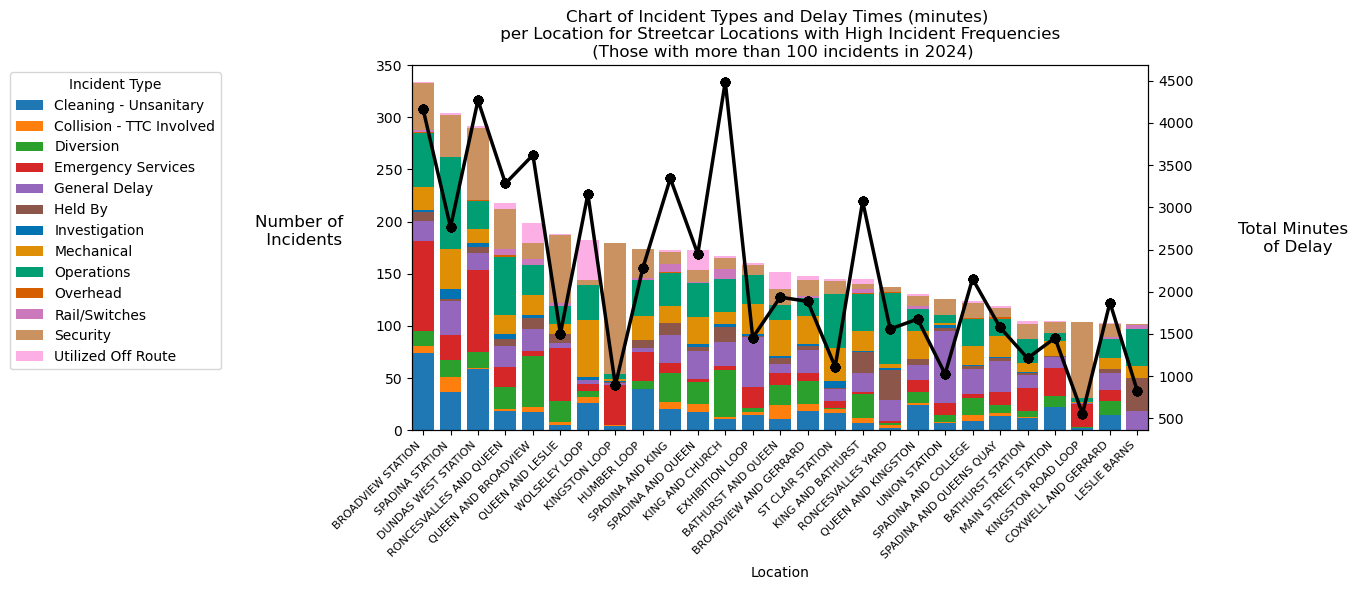

In [101]:
High_Incident_Locations_wide = High_Incident_Locations_wide.reindex(Descending_List)

fig, ax1 = plt.subplots(figsize=(16, 6))

# Track cumulative values for stacking
bottom = pd.Series([0]*len(High_Incident_Locations_wide), index=High_Incident_Locations_wide.index)

seaborn_colors = sns.color_palette("colorblind", n_colors=len(High_Incident_Locations_wide.columns))
mpl_colors = colors = plt.cm.get_cmap('tab10').colors
combined_colors = list(mpl_colors[:6]) + list(seaborn_colors[:8])

# Loop through incident types
for i, incident in enumerate(High_Incident_Locations_wide.columns):
    ax1.bar(High_Incident_Locations_wide.index, High_Incident_Locations_wide[incident],
            bottom=bottom,
            label=incident,
            color=combined_colors[i])
    bottom += High_Incident_Locations_wide[incident]

# Labels and legend
ax1.set_ylabel('Number of \n Incidents', rotation = 0, fontsize = 12, labelpad = 40)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.set_xlabel('Location')
ax1.set_title('Chart of Incident Types and Delay Times (minutes) \n per Location for Streetcar Locations with High Incident Frequencies \n (Those with more than 100 incidents in 2024)')
ax1.legend(title='Incident Type', bbox_to_anchor=(-0.25, 1), loc='upper right')

ax1.set_xticklabels(High_Incident_Locations_wide.index, rotation=45, ha='right', fontsize=8)

plt.ylim(0, 350)
ax1.margins(x=0) 


ax2 = ax1.twinx()
ax2.plot(
    more_totals['Location'],
    more_totals['Total Minutes of Delay'],
    color='black',
    marker='o',
    linewidth=2.5,
    label='Average Delay (min)'

)

ax2.set_ylabel('Total Minutes \n of Delay', rotation = 0, labelpad=40, fontsize = 12)
ax2.yaxis.set_label_coords(1.2, 0.57)

plt.tight_layout()
plt.show()